### **Data Preparation**

In [1]:
import os
import ast # Abstract Syntax Trees
import json
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
"""import kagglehub

# connecting with kaggle (downloading data)
path = kagglehub.dataset_download("ravindrasinghrana/job-description-dataset")

print("Path to dataset files:", path)

print(os.listdir(path)) # files inside dataset folder

df = pd.read_csv(path + "/job_descriptions.csv")
df.head(3)"""

'import kagglehub\n\n# connecting with kaggle (downloading data)\npath = kagglehub.dataset_download("ravindrasinghrana/job-description-dataset")\n\nprint("Path to dataset files:", path)\n\nprint(os.listdir(path)) # files inside dataset folder\n\ndf = pd.read_csv(path + "/job_descriptions.csv")\ndf.head(3)'

In [3]:
df=pd.read_csv(r"D:\InnoMinds\job_descriptions.csv\job_descriptions.csv")

In [4]:
# df=df[:500000]

In [5]:
df.shape

(1615940, 23)

In [6]:
pd.set_option("display.max_columns", None)
df.head(3)

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,Job Posting Date,Preference,Contact Person,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,2022-04-24,Female,Brandon Cunningham,001-381-930-7517x737,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,2022-12-19,Female,Francisco Larsen,461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com..."
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,2022-09-14,Male,Gary Gibson,9687619505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615940 entries, 0 to 1615939
Data columns (total 23 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Job Id            1615940 non-null  int64  
 1   Experience        1615940 non-null  object 
 2   Qualifications    1615940 non-null  object 
 3   Salary Range      1615940 non-null  object 
 4   location          1615940 non-null  object 
 5   Country           1615940 non-null  object 
 6   latitude          1615940 non-null  float64
 7   longitude         1615940 non-null  float64
 8   Work Type         1615940 non-null  object 
 9   Company Size      1615940 non-null  int64  
 10  Job Posting Date  1615940 non-null  object 
 11  Preference        1615940 non-null  object 
 12  Contact Person    1615940 non-null  object 
 13  Contact           1615940 non-null  object 
 14  Job Title         1615940 non-null  object 
 15  Role              1615940 non-null  object 
 16  

In [8]:
df['Company Profile'].value_counts()

Company Profile
{"Sector":"Automotive","Industry":"Automotive","City":"Munich","State":"N/A","Zip":"N/A","Website":"www.bmwgroup.com","Ticker":"BMW","CEO":"Oliver Zipse"}                                  3572
{"Sector":"Utilities","Industry":"Utilities: Gas and Electric","City":"Detroit","State":"Michigan","Zip":"48226","Website":"www.dteenergy.com","Ticker":"DTE","CEO":"Gerardo Norcia"}       1957
{"Sector":"Packaging","Industry":"Packaging, Containers","City":"Evansville","State":"Indiana","Zip":"47710","Website":"www.berryglobal.com","Ticker":"BERY","CEO":"Thomas E. Salmon"}      1941
{"Sector":"Insurance","Industry":"Diversified Financials","City":"New York","State":"New York","Zip":"10036","Website":"www.marshmclennan.com","Ticker":"MMC","CEO":"John Q. Doyle"}        1941
{"Sector":"Energy","Industry":"Energy","City":"Irving","State":"Texas","Zip":"75039","Website":"www.vistracorp.com","Ticker":"VST","CEO":""}                                                1938
                   

In [9]:
df.isnull().sum()  # the data has 5478 null values in 'Company Profile'

Job Id                 0
Experience             0
Qualifications         0
Salary Range           0
location               0
Country                0
latitude               0
longitude              0
Work Type              0
Company Size           0
Job Posting Date       0
Preference             0
Contact Person         0
Contact                0
Job Title              0
Role                   0
Job Portal             0
Job Description        0
Benefits               0
skills                 0
Responsibilities       0
Company                0
Company Profile     5478
dtype: int64

#### **1. Career Categorizing**

- Grouping jobs by **Career Category.**
- Each row in `Company Profile` column is like a JSON-like dictionary with:
  - `Sector` (e.g., Automotive, Utilities, Technology and Engineering)

  - `Industry` (e.g., Insurance, Packaging, Telecommunications)

  - `City`, `State`, `Zip` (location details)

  - `Website`, `Ticker`, `CEO` (extra company metadata)

In [10]:
df_cleaned = df.copy()

In [11]:
# each row in `Company Profile` is a string so we need to convert each one into a dictionary
def parse_company_profile(x):
    if pd.isnull(x):  # originally missing (original data)
        return None
    if isinstance(x, dict):  # already parsed
        return x
    try:
        return json.loads(x)
    except Exception as e:
        return "PARSE_ERROR"  # flagging failed rows

df_cleaned['Company Profile Parsed'] = df_cleaned['Company Profile'].apply(parse_company_profile)

In [12]:
# separating Sector / Industry (in case of parsing succeeded)
df_cleaned['Sector'] = df_cleaned['Company Profile Parsed'].apply(lambda x: x.get('Sector') if isinstance(x, dict) else None)
df_cleaned['Industry'] = df_cleaned['Company Profile Parsed'].apply(lambda x: x.get('Industry') if isinstance(x, dict) else None)

In [13]:
# original (all) null values before parsing
print(df_cleaned['Company Profile'].isna().sum(), "original NaNs")

5478 original NaNs


In [14]:
df_cleaned.head()

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,Job Posting Date,Preference,Contact Person,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile,Company Profile Parsed,Sector,Industry
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,2022-04-24,Female,Brandon Cunningham,001-381-930-7517x737,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie...","{'Sector': 'Diversified', 'Industry': 'Diversi...",Diversified,Diversified Financials
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,2022-12-19,Female,Francisco Larsen,461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com...","{'Sector': 'Financial Services', 'Industry': '...",Financial Services,Commercial Banks
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,2022-09-14,Male,Gary Gibson,9687619505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P...","{'Sector': 'Insurance', 'Industry': 'Insurance...",Insurance,Insurance: Property and Casualty (Stock)
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,2023-02-25,Female,Joy Lucero,+1-820-643-5431x47576,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O...","{'Sector': 'Energy', 'Industry': 'Mining, Crud...",Energy,"Mining, Crude-Oil Production"
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,2022-10-11,Female,Julie Johnson,343.975.4702x9340,Event Manager,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ...","{'Sector': 'Energy', 'Industry': 'Energy - Oil...",Energy,Energy - Oil & Gas Exploration & Production


In [15]:
# rows that are failed to be parsed so they are null values now
print((df_cleaned['Company Profile Parsed']=="PARSE_ERROR").sum(), "failed to parse")

# then
print(df_cleaned['Sector'].isna().sum(), "missing Sector after extraction")

1844 failed to parse
7322 missing Sector after extraction


##### **Fixing Inconsistency in Missing Sectors**

In [16]:
df_cleaned = df.copy()

In [17]:
bad_rows = []

for i, val in enumerate(df_cleaned['Company Profile']):
    if pd.isna(val):
        continue
    try:
        json.loads(val)
    except Exception as e:
        bad_rows.append((i, val[:150], str(e)))  # show first 150 chars

print("Bad rows count:", len(bad_rows))
bad_rows[:5]


Bad rows count: 1844


[(139,
  '{"Sector":"Construction","Industry":"Engineering & Construction","City":"Houston","State":"Texas","Zip":"77008","Website":"www.quantaservices.com","Ti',
  "Expecting ',' delimiter: line 1 column 179 (char 178)"),
 (551,
  '{"Sector":"Construction","Industry":"Engineering & Construction","City":"Houston","State":"Texas","Zip":"77008","Website":"www.quantaservices.com","Ti',
  "Expecting ',' delimiter: line 1 column 179 (char 178)"),
 (975,
  '{"Sector":"Construction","Industry":"Engineering & Construction","City":"Houston","State":"Texas","Zip":"77008","Website":"www.quantaservices.com","Ti',
  "Expecting ',' delimiter: line 1 column 179 (char 178)"),
 (1371,
  '{"Sector":"Construction","Industry":"Engineering & Construction","City":"Houston","State":"Texas","Zip":"77008","Website":"www.quantaservices.com","Ti',
  "Expecting ',' delimiter: line 1 column 179 (char 178)"),
 (1880,
  '{"Sector":"Construction","Industry":"Engineering & Construction","City":"Houston","State":"Texas

In [18]:
def fix_ceo_quotes(val):
    if pd.isna(val):
        return None
    try:
        return json.loads(val)
    except:
        # excaping unescaped quotes inside CEO field
        fixed = re.sub(r'("CEO":\s*".*?)(?<!\\)"(.*?)(?<!\\)"(.*?")',
                       r'\1\\" \2 \\"\3', val)
        try:
            return json.loads(fixed)
        except:
            return None

df_cleaned['Company Profile Parsed'] = df_cleaned['Company Profile'].apply(fix_ceo_quotes)
df_cleaned['Sector'] = df_cleaned['Company Profile Parsed'].apply(lambda x: x.get('Sector') if isinstance(x, dict) else None)
df_cleaned['Industry'] = df_cleaned['Company Profile Parsed'].apply(lambda x: x.get('Industry') if isinstance(x, dict) else None)

print("Remaining nulls in Sector:", df_cleaned['Sector'].isna().sum())

Remaining nulls in Sector: 5478


In [19]:
df_cleaned['Sector'].value_counts()

Sector
Financial Services                139573
Energy                            104048
Retail                             87633
Insurance                          73135
Automotive                         61862
                                   ...  
Healthcare/Hospitals                1751
Beverage/Alcohol                    1751
Chemicals and Energy                1746
Manufacturing/Building Systems      1730
Technology and Engineering          1678
Name: count, Length: 204, dtype: int64

In [20]:
df_cleaned['Industry'].value_counts()

Industry
Pharmaceuticals                            54538
Chemicals                                  50787
Utilities: Gas and Electric                41874
Telecommunications                         40031
Commercial Banks                           38370
                                           ...  
Business Services - Data/Analytics          1753
Food and Beverage - Alcoholic Beverages     1751
Cement and Chemicals                        1749
Manufacturing/Building Systems              1730
Retail - Home Improvement                   1714
Name: count, Length: 204, dtype: int64

In [21]:
null_profiles = df_cleaned[df_cleaned['Company Profile'].isna()]
null_profiles.head()

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,Job Posting Date,Preference,Contact Person,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile,Company Profile Parsed,Sector,Industry
110,2758708236284517,3 to 8 Years,B.Tech,$59K-$94K,George Town,Cayman Islands,19.3133,-81.2546,Part-Time,86718,2023-08-22,Male,Danielle Pruitt,7906673931,Database Administrator,Database Developer,SimplyHired,"A Database Developer designs, develops, and ma...","{'Employee Referral Programs, Financial Counse...",Database design and development SQL and databa...,"Design and implement database systems, tables,...",Peter Kiewit Sons,NaN,None,None,None
482,1256176335840374,3 to 13 Years,B.Tech,$62K-$117K,Brussels,Belgium,50.5039,4.4699,Full-Time,65653,2022-02-12,Both,Aaron Santiago,001-620-731-2289x933,Architect,Sustainable Design Specialist,LinkedIn,Sustainable Design Specialists incorporate eco...,"{'Employee Referral Programs, Financial Counse...",Sustainable design principles Energy efficienc...,Focus on sustainable and eco-friendly architec...,Estée Lauder,NaN,None,None,None
1478,700667448142407,0 to 8 Years,BA,$61K-$101K,Quito,Ecuador,-1.8312,-78.1834,Contract,31086,2022-03-19,Male,Larry Humphrey,534-263-6605,Financial Controller,Accounting Controller,LinkedIn,Accounting Controllers manage an organizations...,"{'Employee Referral Programs, Financial Counse...",Accounting Financial reporting Financial audit...,"Manage accounting functions, including account...",Peter Kiewit Sons,NaN,None,None,None
1828,196368924080457,1 to 14 Years,PhD,$60K-$109K,Hanoi,Vietnam,14.0583,108.2772,Temporary,91610,2023-08-30,Male,Jason Ayala,8723680836,Financial Planner,Tax Planner,Stack Overflow Jobs,"Assist clients with tax planning, minimize tax...","{'Life and Disability Insurance, Stock Options...",Tax planning strategies Tax law knowledge Fina...,"Focus on tax planning and optimization, helpin...","Dunkin'Brands Group, Inc.",NaN,None,None,None
1874,669127484126386,2 to 8 Years,M.Com,$57K-$128K,Dakar,Senegal,14.4974,-14.4524,Intern,27214,2022-05-21,Both,Robin Horn,(299)540-5563x293,Event Planner,Corporate Event Planner,USAJOBS,Corporate Event Planners organize business-rel...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Corporate event planning Corporate branding Co...,"Organize corporate events, conferences, and se...",Estée Lauder,NaN,None,None,None


In [22]:
df_cleaned[df_cleaned['Sector'].isna()][['Job Id','Job Title','Role','Company','Job Description','skills']].tail(10)

,Job Id,Job Title,Role,Company,Job Description,skills
1613696,2256150092137915,Front-End Developer,UI/UX Developer,"Dunkin'Brands Group, Inc.",A UI/UX Developer combines design and technica...,User interface (UI) design User experience (UX...
1613707,821837639534024,Purchasing Agent,Inventory Manager,"Dunkin'Brands Group, Inc.",An Inventory Manager oversees inventory levels...,Inventory control Demand forecasting Supply ch...
1614141,2722761997893109,Chemical Analyst,Quality Control Analyst,"Dunkin'Brands Group, Inc.","In the role of a Quality Control Analyst, you ...",Quality control Quality assurance QC testing m...
1614249,1043958588676768,Litigation Attorney,Trial Attorney,Peter Kiewit Sons,Trial Attorneys represent clients in legal pro...,Litigation Legal research Courtroom representa...
1614430,2550530271622961,Architectural Designer,Architectural Drafter,"Dunkin'Brands Group, Inc.",Architectural Drafters assist architects and e...,Architectural drafting AutoCAD 2D and 3D model...
1614874,2697356543000511,Electrical Designer,Lighting Designer,Peter Kiewit Sons,Lighting Designers create lighting plans for a...,Lighting design Architectural lighting Lightin...
1614908,2922844442400023,Registered Nurse,Clinical Nurse Specialist,Estée Lauder,A Clinical Nurse Specialist is an advanced pra...,"Clinical nursing specialization (e.g., critica..."
1615029,2652013558344708,Registered Nurse,Clinical Nurse Specialist,Estée Lauder,A Clinical Nurse Specialist is an advanced pra...,"Clinical nursing specialization (e.g., critica..."
1615118,1989513875071329,Marketing Manager,Brand Manager,Estée Lauder,Brand Managers are responsible for maintaining...,Brand strategy development Brand identity and ...
1615204,854750947408034,Network Administrator,Network Security Analyst,"Dunkin'Brands Group, Inc.",Protect an organizations computer networks and...,Network security protocols Intrusion detection...


In [23]:
df_cleaned[df_cleaned['Sector'].notna()][['Job Id','Job Title','Role','Company','Job Description','skills', 'Company Profile']].tail(10)

,Job Id,Job Title,Role,Company,Job Description,skills,Company Profile
1615930,690948368250854,Environmental Consultant,Sustainability Consultant,J.M. Smucker,Sustainability Consultants advise organization...,Sustainability consulting Sustainability asses...,"{""Sector"":""Food & Beverage"",""Industry"":""Food C..."
1615931,2420889207346482,Technical Writer,Content Writer,Westpac Banking Corporation,Content Writers create written content for var...,Writing skills Content creation SEO knowledge ...,"{""Sector"":""Banking"",""Industry"":""Banking/Financ..."
1615932,1162938205421273,UI Developer,UX/UI Designer,Drax Group,A UX/UI Designer focuses on enhancing user exp...,User experience (UX) design User interface (UI...,"{""Sector"":""Energy"",""Industry"":""Energy - Utilit..."
1615933,740641885304747,Process Engineer,Chemical Engineer,St. James's Place plc,Chemical Engineers design and oversee processe...,Chemical engineering Process design Chemical r...,"{""Sector"":""Financial Services"",""Industry"":""Fin..."
1615934,371430155110052,Social Worker,Child Welfare Worker,Icahn Enterprises,"Work with at-risk children and families, asses...",Child welfare policies and regulations Child p...,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
1615935,134563577088850,Mechanical Engineer,Mechanical Design Engineer,The Hershey Company,Mechanical Design Engineers create and develop...,"Mechanical engineering CAD software (e.g., Sol...","{""Sector"":""Food and Beverage/Confectionery"",""I..."
1615936,618604818190827,IT Manager,IT Director,EQT,An IT Director oversees an organizations IT de...,Strategic IT planning Leadership and managemen...,"{""Sector"":""Energy"",""Industry"":""Energy"",""City"":..."
1615937,615471367712200,Mechanical Engineer,Mechanical Design Engineer,KLA,Mechanical Design Engineers create and develop...,"Mechanical engineering CAD software (e.g., Sol...","{""Sector"":""Technology"",""Industry"":""Semiconduct..."
1615938,804137342023945,HR Coordinator,Training Coordinator,Mahindra & Mahindra,Training Coordinators design and implement emp...,Training program coordination Training materia...,"{""Sector"":""Automotive"",""Industry"":""Automotive""..."
1615939,404645755314484,Event Planner,Wedding Planner,Ashtead Group,Wedding Planners specialize in organizing wedd...,Wedding planning Venue selection Catering and ...,"{""Sector"":""Equipment Rental"",""Industry"":""Equip..."


In [24]:
df.duplicated().sum()

0

#### **2. Imputing Missing Values in `Sector` and `Industry`**

In [25]:
# Companies with missing profiles
missing_companies = df_cleaned[df_cleaned['Company Profile'].isna()]['Company'].unique()

# Check how many of them exist with a filled profile
overlap = df_cleaned[df_cleaned['Company'].isin(missing_companies) & df_cleaned['Company Profile'].notna()]['Company'].unique()

print("Companies with missing profile:", len(missing_companies))
print("Companies we can fix using duplicates:", len(overlap))

Companies with missing profile: 3
Companies we can fix using duplicates: 0


In [26]:
missing_comp_distinct = df_cleaned[df_cleaned['Company Profile'].isna()]['Company'].value_counts()
missing_comp_distinct

Company
Peter Kiewit Sons            1850
Dunkin'Brands Group, Inc.    1822
Estée Lauder                 1806
Name: count, dtype: int64

In [27]:
print(df_cleaned[df_cleaned['Company'] == "Peter Kiewit Sons"].shape[0])
print(df_cleaned[df_cleaned['Company'] == "Dunkin'Brands Group, Inc."].shape[0])
print(df_cleaned[df_cleaned['Company'] == "Estée Lauder"].shape[0])

1850
1822
1806


In [28]:
df_cleaned['Industry'].value_counts()

Industry
Pharmaceuticals                            54538
Chemicals                                  50787
Utilities: Gas and Electric                41874
Telecommunications                         40031
Commercial Banks                           38370
                                           ...  
Business Services - Data/Analytics          1753
Food and Beverage - Alcoholic Beverages     1751
Cement and Chemicals                        1749
Manufacturing/Building Systems              1730
Retail - Home Improvement                   1714
Name: count, Length: 204, dtype: int64

In [29]:
df_cleaned[df_cleaned['Sector'] == "Consumer Goods"]['Industry'].value_counts()

Industry
Consumer Goods                     9032
Household and Personal Products    5458
Electrical Equipment               3624
Home Equipment, Furnishings        1860
Personal Care & Cosmetics          1852
Jewelry and Watches                1838
Conglomerate                       1834
Paints and Coatings                1755
Name: count, dtype: int64

In [30]:
df_imputed = df_cleaned.copy()

In [31]:
# Imputing those missing values dictionary mapping
mapping = {
    "Peter Kiewit Sons": {"Sector": "Construction", "Industry": "Engineering & Construction"},
    "Dunkin'Brands Group, Inc.": {"Sector": "Food & Beverage", "Industry": "Restaurants"},
    "Estée Lauder": {"Sector": "Consumer Goods", "Industry": "Personal Care & Cosmetics"}
}

for company, info in mapping.items():
    mask = (df_imputed['Company'] == company) & (df_imputed['Sector'].isna())
    df_imputed.loc[mask, 'Sector'] = info['Sector']
    df_imputed.loc[mask, 'Industry'] = info['Industry']

In [32]:
df_imputed.isnull().sum() # result ==> no nulls in `Sector` and `Industry` cols

Job Id                       0
Experience                   0
Qualifications               0
Salary Range                 0
location                     0
Country                      0
latitude                     0
longitude                    0
Work Type                    0
Company Size                 0
Job Posting Date             0
Preference                   0
Contact Person               0
Contact                      0
Job Title                    0
Role                         0
Job Portal                   0
Job Description              0
Benefits                     0
skills                       0
Responsibilities             0
Company                      0
Company Profile           5478
Company Profile Parsed    5478
Sector                       0
Industry                     0
dtype: int64

In [33]:
df_imputed.tail(3)

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,Job Posting Date,Preference,Contact Person,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile,Company Profile Parsed,Sector,Industry
1615937,615471367712200,4 to 15 Years,BCA,$60K-$96K,Ashgabat,Turkmenistan,38.9697,59.5563,Part-Time,114287,2022-01-23,Female,Bryan Morales,537.384.6193x5284,Mechanical Engineer,Mechanical Design Engineer,Indeed,Mechanical Design Engineers create and develop...,"{'Tuition Reimbursement, Stock Options or Equi...","Mechanical engineering CAD software (e.g., Sol...","Design mechanical systems, components, and pro...",KLA,"{""Sector"":""Technology"",""Industry"":""Semiconduct...","{'Sector': 'Technology', 'Industry': 'Semicond...",Technology,Semiconductors and Other Electronic Components
1615938,804137342023945,5 to 15 Years,BCA,$65K-$103K,Ouagadougou,Burkina Faso,12.2383,-1.5616,Full-Time,45009,2021-12-28,Female,Steven Dunn,(484)257-4755x5346,HR Coordinator,Training Coordinator,Stack Overflow Jobs,Training Coordinators design and implement emp...,"{'Casual Dress Code, Social and Recreational A...",Training program coordination Training materia...,"Coordinate employee training programs, track t...",Mahindra & Mahindra,"{""Sector"":""Automotive"",""Industry"":""Automotive""...","{'Sector': 'Automotive', 'Industry': 'Automoti...",Automotive,Automotive
1615939,404645755314484,1 to 11 Years,BBA,$56K-$109K,Asmara,Eritrea,15.1794,39.7823,Part-Time,87637,2022-10-01,Male,Jennifer Moore,(989)703-9723,Event Planner,Wedding Planner,USAJOBS,Wedding Planners specialize in organizing wedd...,"{'Transportation Benefits, Professional Develo...",Wedding planning Venue selection Catering and ...,"Specialize in wedding planning, assisting coup...",Ashtead Group,"{""Sector"":""Equipment Rental"",""Industry"":""Equip...","{'Sector': 'Equipment Rental', 'Industry': 'Eq...",Equipment Rental,Equipment Rental


In [34]:
pd.set_option('display.max_rows', None)

In [35]:
sectors_df = df_imputed['Sector'].value_counts()
sectors_df.to_csv('sectors_df.csv', index=True)

In [36]:
industry_types = df_imputed['Industry'].value_counts()
industry_types.to_csv('industry_types.csv', index=True)

In [37]:
df_imputed[df_imputed['Sector'] == "Healthcare Services"].head(10)

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,Job Posting Date,Preference,Contact Person,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile,Company Profile Parsed,Sector,Industry
290,273337118353274,2 to 14 Years,BCA,$64K-$130K,Yamoussoukro,Cote d'Ivoire,7.5400,-5.5471,Full-Time,30038,2022-11-20,Both,Andrew Wells,273.726.8596x463,Customer Support Specialist,Customer Success Manager,ZipRecruiter,Customer Success Managers focus on ensuring cu...,"{'Childcare Assistance, Paid Time Off (PTO), R...",Customer relationship management Onboarding an...,Build and maintain strong customer relationshi...,Laboratory Corp. of America,"{""Sector"":""Healthcare Services"",""Industry"":""He...","{'Sector': 'Healthcare Services', 'Industry': ...",Healthcare Services,Health Care: Pharmacy and Other Services
334,1073442790861359,4 to 12 Years,M.Tech,$65K-$88K,Pretoria,South Africa,-30.5595,22.9375,Temporary,130862,2022-03-11,Male,Matthew Garza,662-927-1010,Database Administrator,Database Analyst,The Muse,A Database Analyst examines and interprets dat...,"{'Employee Assistance Programs (EAP), Tuition ...",Data analysis Database querying and reporting ...,Analyze and interpret database performance dat...,DaVita,"{""Sector"":""Healthcare Services"",""Industry"":""He...","{'Sector': 'Healthcare Services', 'Industry': ...",Healthcare Services,Health Care: Medical Facilities
361,2382673250573351,3 to 9 Years,B.Tech,$60K-$88K,Ottawa,Canada,56.1304,-106.3468,Full-Time,62190,2023-07-26,Both,Matthew Henderson,(489)482-2780x96363,Nurse Practitioner,Primary Care Nurse Practitioner,Internships.com,Primary Care Nurse Practitioners provide essen...,"{'Legal Assistance, Bonuses and Incentive Prog...",Nursing care Patient assessment Health promoti...,Provide comprehensive primary healthcare servi...,Owens & Minor,"{""Sector"":""Healthcare Services"",""Industry"":""Wh...","{'Sector': 'Healthcare Services', 'Industry': ...",Healthcare Services,Wholesalers: Health Care
364,1400263350909761,4 to 10 Years,M.Tech,$61K-$85K,Sri Jayawardenepura Kotte,Sri Lanka,7.8731,80.7718,Part-Time,105582,2021-12-01,Female,Joseph Barber,001-485-356-0329x7397,Litigation Attorney,Trial Attorney,Stack Overflow Jobs,Trial Attorneys represent clients in legal pro...,"{'Tuition Reimbursement, Stock Options or Equi...",Litigation Legal research Courtroom representa...,"Represent clients in civil or criminal trials,...",DaVita,"{""Sector"":""Healthcare Services"",""Industry"":""He...","{'Sector': 'Healthcare Services', 'Industry': ...",Healthcare Services,Health Care: Medical Facilities
393,2586689383653280,2 to 11 Years,B.Tech,$62K-$81K,Guatemala City,Guatemala,15.7835,-90.2308,Full-Time,58024,2023-06-28,Female,Melissa Zimmerman,(906)504-6010x1167,Operations Manager,Quality Control Manager,FlexJobs,Quality Control Managers establish and enforce...,"{'Health Insurance, Retirement Plans, Flexible...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,Quest Diagnostics,"{""Sector"":""Healthcare Services"",""Industry"":""He...","{'Sector': 'Healthcare Services', 'Industry': ...",Healthcare Services,Health Care: Pharmacy and Other Services
444,43398361800795,0 to 14 Years,B.Tech,$63K-$123K,Saint John's,Antigua and Barbuda,17.0608,-61.7964,Intern,31911,2023-02-12,Female,Timothy Fisher,+1-978-804-3342x0601,Database Administrator,Database Security Specialist,The Muse,A Database Security Specialist focuses on prot...,"{'Health Insurance, Retirement Plans, Flexible...",Database security measures Data encryption and...,Implement and maintain security measures to pr...,Quest Diagnostics,"{""Sector"":""Healthcare Services"",""Industry"":""He...","{'Sector': 'Healthcare Services', 'Industry': ...",Healthcare Services,Health Care: Pharmacy and Other Services
542,725450117689704,1 to 10 Years,M.Tech,$61K-$101K,Djibouti (city),Djibouti,11.8251,42

In [38]:
df_imputed.tail(2)

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,Job Posting Date,Preference,Contact Person,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile,Company Profile Parsed,Sector,Industry
1615938,804137342023945,5 to 15 Years,BCA,$65K-$103K,Ouagadougou,Burkina Faso,12.2383,-1.5616,Full-Time,45009,2021-12-28,Female,Steven Dunn,(484)257-4755x5346,HR Coordinator,Training Coordinator,Stack Overflow Jobs,Training Coordinators design and implement emp...,"{'Casual Dress Code, Social and Recreational A...",Training program coordination Training materia...,"Coordinate employee training programs, track t...",Mahindra & Mahindra,"{""Sector"":""Automotive"",""Industry"":""Automotive""...","{'Sector': 'Automotive', 'Industry': 'Automoti...",Automotive,Automotive
1615939,404645755314484,1 to 11 Years,BBA,$56K-$109K,Asmara,Eritrea,15.1794,39.7823,Part-Time,87637,2022-10-01,Male,Jennifer Moore,(989)703-9723,Event Planner,Wedding Planner,USAJOBS,Wedding Planners specialize in organizing wedd...,"{'Transportation Benefits, Professional Develo...",Wedding planning Venue selection Catering and ...,"Specialize in wedding planning, assisting coup...",Ashtead Group,"{""Sector"":""Equipment Rental"",""Industry"":""Equip...","{'Sector': 'Equipment Rental', 'Industry': 'Eq...",Equipment Rental,Equipment Rental


#### **3. Extracting Min and Max Experiences**
- `min`
- `max`

In [39]:
df_imputed['Experience'].value_counts()

Experience
5 to 8 Years     34120
5 to 12 Years    34056
5 to 9 Years     34020
3 to 13 Years    33915
3 to 15 Years    33878
2 to 9 Years     33862
3 to 8 Years     33854
1 to 11 Years    33820
3 to 12 Years    33805
1 to 10 Years    33793
4 to 11 Years    33776
3 to 9 Years     33744
4 to 14 Years    33744
4 to 12 Years    33737
2 to 8 Years     33736
4 to 15 Years    33732
0 to 11 Years    33729
1 to 13 Years    33724
4 to 8 Years     33715
2 to 13 Years    33712
1 to 9 Years     33710
1 to 12 Years    33703
0 to 15 Years    33693
1 to 15 Years    33681
1 to 8 Years     33680
3 to 11 Years    33663
0 to 14 Years    33650
5 to 14 Years    33629
4 to 10 Years    33621
0 to 9 Years     33601
5 to 11 Years    33600
5 to 13 Years    33592
2 to 14 Years    33584
0 to 8 Years     33575
1 to 14 Years    33570
2 to 10 Years    33532
3 to 14 Years    33530
0 to 12 Years    33523
0 to 13 Years    33516
2 to 12 Years    33512
2 to 11 Years    33488
5 to 15 Years    33477
5 to 10 Years    33471


In [40]:
df_imputed['Exp_min'] = df_imputed['Experience'].str.extract(r'^(\d+)').astype(float)
df_imputed['Exp_max'] = df_imputed['Experience'].str.extract(r'to (\d+)').astype(float)

# then averaging experience
df_imputed['Exp_avg'] = (df_imputed['Exp_min'] + df_imputed['Exp_max']) / 2

In [41]:
df_imputed.head(2)

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,Job Posting Date,Preference,Contact Person,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile,Company Profile Parsed,Sector,Industry,Exp_min,Exp_max,Exp_avg
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,2022-04-24,Female,Brandon Cunningham,001-381-930-7517x737,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie...","{'Sector': 'Diversified', 'Industry': 'Diversi...",Diversified,Diversified Financials,5.0,15.0,10.0
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,2022-12-19,Female,Francisco Larsen,461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com...","{'Sector': 'Financial Services', 'Industry': '...",Financial Services,Commercial Banks,2.0,12.0,7.0


In [42]:
df_imputed[['Exp_min', 'Exp_max', 'Exp_avg']].describe()

,Exp_min,Exp_max,Exp_avg
count,1.615940e+06,1.615940e+06,1.615940e+06
mean,2.501808e+00,1.149798e+01,6.999895e+00
std,1.707809e+00,2.291933e+00,1.428458e+00
min,0.000000e+00,8.000000e+00,4.000000e+00
25%,1.000000e+00,9.000000e+00,6.000000e+00
50%,3.000000e+00,1.100000e+01,7.000000e+00
75%,4.000000e+00,1.300000e+01,8.000000e+00
max,5.000000e+00,1.500000e+01,1.000000e+01


#### **4. Extracting Min and Max Salaries**

In [43]:
df_imputed['Salary Range'].value_counts()

Salary Range
$59K-$88K     3043
$58K-$101K    3038
$62K-$82K     3033
$61K-$106K    3025
$61K-$112K    3015
$62K-$107K    3003
$64K-$83K     3003
$64K-$120K    3003
$62K-$84K     3000
$65K-$125K    2996
$55K-$129K    2992
$61K-$117K    2992
$65K-$90K     2991
$60K-$89K     2986
$65K-$102K    2985
$65K-$104K    2984
$60K-$85K     2983
$55K-$94K     2982
$59K-$100K    2981
$64K-$107K    2981
$64K-$123K    2979
$56K-$95K     2979
$62K-$80K     2977
$56K-$83K     2973
$63K-$91K     2972
$65K-$99K     2971
$65K-$93K     2968
$58K-$90K     2968
$65K-$87K     2964
$59K-$120K    2963
$59K-$109K    2962
$55K-$100K    2961
$62K-$103K    2959
$55K-$92K     2958
$65K-$94K     2958
$56K-$91K     2957
$58K-$96K     2957
$63K-$110K    2956
$59K-$113K    2956
$64K-$98K     2956
$59K-$97K     2955
$59K-$93K     2955
$62K-$96K     2954
$61K-$100K    2954
$64K-$96K     2954
$58K-$115K    2953
$65K-$120K    2951
$59K-$95K     2951
$55K-$128K    2950
$63K-$124K    2950
$56K-$100K    2950
$56K-$96K     2950

In [44]:
# removing special chars, then splitting into `min` and `max`
df_imputed[['Salary_min', 'Salary_max']] = df_imputed['Salary Range'].str.replace('$','').str.replace('K','').str.split('-', expand=True).astype(float)

df_imputed['Salary_avg'] = (df_imputed['Salary_min'] + df_imputed['Salary_max']) / 2

In [45]:
df_imputed[['Salary Range', 'Salary_min', 'Salary_max', 'Salary_avg']].describe()

,Salary_min,Salary_max,Salary_avg
count,1.615940e+06,1.615940e+06,1.615940e+06
mean,6.000343e+01,1.049789e+02,8.249115e+01
std,3.163964e+00,1.471749e+01,7.528413e+00
min,5.500000e+01,8.000000e+01,6.750000e+01
25%,5.700000e+01,9.200000e+01,7.600000e+01
50%,6.000000e+01,1.050000e+02,8.250000e+01
75%,6.300000e+01,1.180000e+02,8.900000e+01
max,6.500000e+01,1.300000e+02,9.750000e+01


In [46]:
df_imputed.tail(2)

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,Job Posting Date,Preference,Contact Person,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile,Company Profile Parsed,Sector,Industry,Exp_min,Exp_max,Exp_avg,Salary_min,Salary_max,Salary_avg
1615938,804137342023945,5 to 15 Years,BCA,$65K-$103K,Ouagadougou,Burkina Faso,12.2383,-1.5616,Full-Time,45009,2021-12-28,Female,Steven Dunn,(484)257-4755x5346,HR Coordinator,Training Coordinator,Stack Overflow Jobs,Training Coordinators design and implement emp...,"{'Casual Dress Code, Social and Recreational A...",Training program coordination Training materia...,"Coordinate employee training programs, track t...",Mahindra & Mahindra,"{""Sector"":""Automotive"",""Industry"":""Automotive""...","{'Sector': 'Automotive', 'Industry': 'Automoti...",Automotive,Automotive,5.0,15.0,10.0,65.0,103.0,84.0
1615939,404645755314484,1 to 11 Years,BBA,$56K-$109K,Asmara,Eritrea,15.1794,39.7823,Part-Time,87637,2022-10-01,Male,Jennifer Moore,(989)703-9723,Event Planner,Wedding Planner,USAJOBS,Wedding Planners specialize in organizing wedd...,"{'Transportation Benefits, Professional Develo...",Wedding planning Venue selection Catering and ...,"Specialize in wedding planning, assisting coup...",Ashtead Group,"{""Sector"":""Equipment Rental"",""Industry"":""Equip...","{'Sector': 'Equipment Rental', 'Industry': 'Eq...",Equipment Rental,Equipment Rental,1.0,11.0,6.0,56.0,109.0,82.5


### **Columns used for Recommendation**
- `Skills`
- `Job Title`
- `Job Description`
- `Responsibilities`
- `Sector`: prefer not to use it.



##### **Standardizing `Sector` Column**
- Before Categorizing and Standardizing them, they are `204`.
- Then we need to map redundant or similar sectors into a single canonical sector label.

In [47]:
sectors_df

Sector
Financial Services                          139573
Energy                                      104048
Retail                                       87633
Insurance                                    73135
Automotive                                   61862
Technology                                   60336
Healthcare                                   60110
Manufacturing                                43385
Real Estate                                  40250
Utilities                                    40146
Telecommunications                           39935
Pharmaceuticals                              36394
Banking                                      36265
Chemicals                                    29129
Consumer Goods                               29059
Food and Beverage                            25411
Transportation                               19819
Information Technology                       18317
Mining                                       14510
Aerospace and Defense   

In [48]:
sector_mapping = {
    # Technology
    "Technology": "Technology",
    "Information Technology": "Technology",
    "IT Services": "Technology",
    "Software": "Technology",
    "Technology and Search": "Technology",
    "Education and Technology": "Technology",
    "Technology and Telecommunications": "Technology",
    "Technology and Electronics": "Technology",
    "Technology/Software": "Technology",
    "Technology/Internet": "Technology",
    "Technology and Engineering": "Technology",

    # Engineering
    "Engineering": "Engineering",
    "Engineering and Construction": "Engineering",
    "Engineering & Construction": "Engineering",
    "Construction and Engineering": "Engineering",
    "Construction/Infrastructure": "Engineering",
    "Construction & Engineering": "Engineering",
    "Electrical/Industrial": "Engineering",
    "Electrical Equipment": "Engineering",
    "Industrial": "Engineering",
    "Manufacturing/Building Systems": "Engineering",
    "Electronics": "Engineering",
    "Semiconductors": "Engineering",
    "Lighting and Technology": "Engineering",

    # Financial Services
    "Financial Services": "Financial Services",
    "Financials": "Financial Services",
    "Banking/Financial Services": "Financial Services",
    "Financial Services/Investment Management": "Financial Services",
    "Financial Services/Investment Banking": "Financial Services",
    "Financial Technology": "Financial Services",
    "Financial Technology/Payments": "Financial Services",
    "Payroll & HR Services": "Financial Services",
    "Asset Management": "Financial Services",
    "Financial Services/Remittances": "Financial Services",

    # Healthcare
    "Healthcare": "Healthcare",
    "Healthcare/Hospitals": "Healthcare",
    "Health Care": "Healthcare",
    "Medical Devices": "Healthcare",
    "Medical Technology": "Healthcare",
    "Healthcare Technology": "Healthcare",

    # Automotive
    "Automotive": "Automotive",
    "Automotive Parts": "Automotive",
    "Automotive/Motorcycles": "Automotive",

    # Food & Beverage
    "Food and Beverage": "Food & Beverage",
    "Food & Beverages": "Food & Beverage",
    "Food & Beverage/Confectionery": "Food & Beverage",
    "Food & Beverage/Spices": "Food & Beverage",
    "Food & Confectionery": "Food & Beverage",
    "Beverage/Alcohol": "Food & Beverage",
    "Food": "Food & Beverage",

    # Retail & Consumer
    "Retail": "Retail & Consumer",
    "Retail/Home Improvement": "Retail & Consumer",
    "Wholesale & Retail": "Retail & Consumer",
    "Retail and Conglomerate": "Retail & Consumer",
    "Consumer Goods": "Retail & Consumer",
    "Consumer Goods/Homecare": "Retail & Consumer",
    "Consumer Discretionary": "Retail & Consumer",

    # Transportation / Logistics
    "Transportation": "Transportation",
    "Transportation and Rail": "Transportation",
    "Transportation/Logistics": "Transportation",
    "Transportation/Airlines": "Transportation",
    "Transportation/Airports": "Transportation",
    "Shipping and Logistics": "Transportation",
    "Travel and Leisure": "Transportation",
    "Travel/Cruise Lines": "Transportation",
    "Rental Cars": "Transportation",

    # Energy / Oil & Gas
    "Energy": "Energy",
    "Oil & Gas": "Energy",
    "Energy/Oil and Gas": "Energy",
    "Natural Gas": "Energy",
    "Oil and Gas Services": "Energy",
    "Renewable Energy": "Energy",
    "Mining and Energy": "Energy",

    # Media & Entertainment
    "Media": "Media & Entertainment",
    "Media & Entertainment": "Media & Entertainment",
    "Entertainment": "Media & Entertainment",
    "Entertainment/Media": "Media & Entertainment",
    "Entertainment/Media Streaming": "Media & Entertainment",
    "Technology and Entertainment": "Media & Entertainment",
    "Entertainment/Gaming": "Media & Entertainment",
    "Technology/Music Streaming": "Media & Entertainment",

    # Chemicals / Pharma
    "Chemicals": "Chemicals",
    "Specialty Chemicals": "Chemicals",
    "Industrial Gases": "Chemicals",
    "Pharmaceuticals": "Chemicals",
    "Chemicals and Energy": "Chemicals",
    "Flavors & Fragrances": "Chemicals",
    "Flavor and Fragrances": "Chemicals",
    "Agrochemicals": "Chemicals",
    "Fertilizers": "Chemicals",

    # Real Estate / Construction
    "Real Estate": "Real Estate",
    "Real Estate/Property Development": "Real Estate",
    "Real Estate/Construction": "Real Estate",
    "Real Estate/Logistics": "Real Estate",
    "Home Construction": "Real Estate",
    "Building Materials": "Real Estate",
    "Construction": "Real Estate",

    # Utilities & Others
    "Utilities": "Utilities",
    "Telecommunications": "Telecommunications",
    "IT Consulting": "Technology",
    "Data and Analytics": "Technology",
    "Services": "Other",
    "Staffing": "Other",
    "Beauty": "Other",
    "Hospitality": "Other",
    "Education": "Other",
    "Gambling": "Other"
}

In [49]:
df_imputed['Sector'] = df_imputed['Sector'].map(lambda x: sector_mapping.get(x, x))

In [50]:
additional_mapping = {
    "Mining and Metals": "Mining",
    "Metals and Mining": "Mining",
    "Mining and Metals/Gold": "Mining",
    "Mining and Metals/Coal": "Mining",
    "Mining and Metals/Aluminum": "Mining",
    "Mining and Metals/Manufacturing": "Mining",
    "Aluminium": "Mining",
    "Aerospace & Defense": "Aerospace and Defense",
    "Aerospace/Defense": "Aerospace and Defense",
    "Aerospace/Building Systems": "Aerospace and Defense",
    "Engineering Services": "Engineering",
    "Semiconductors": "Engineering",
    "Semiconductors": "Engineering",
    "Appliances and Electronics": "Engineering",
    "Appliances": "Engineering",
    "Food and Beverage/Confectionery": "Food & Beverage",
    "Food and Beverage/Spices": "Food & Beverage",
    "Hospitality and Entertainment": "Other",
    "Hospitality/Hotels": "Other",
    "Advertising and Marketing": "Other",
    "Online Job Search": "Other",
    "Professional Services": "Other",
    "Rental & Leasing Services": "Other",
    "Business Services": "Other",
    "Timber & Paper": "Manufacturing",
    "Steel & Metals": "Manufacturing",
    "Materials": "Manufacturing",
    "Cement & Aggregates": "Manufacturing",
    "Motion & Control": "Engineering",
    "Tools & Equipment": "Engineering",
    "Lab Equipment": "Engineering",
    "Electrical Wholesale": "Engineering",
    "Paints & Coatings": "Engineering",
    "Elevators & Escalators": "Engineering",
    "Flooring": "Engineering",
    "Water & Hygiene": "Engineering",
    "Lubricants": "Engineering",
    "Gambling and Gaming": "Other"
}

In [51]:
df_imputed['Sector'] = df_imputed['Sector'].map(lambda x: additional_mapping.get(x, x))

In [52]:
df_imputed['Sector'].nunique()

79

In [53]:
df_imputed['Sector'].value_counts()

Sector
Financial Services                 172350
Energy                             131163
Retail & Consumer                  129278
Technology                         105708
Chemicals                           80100
Automotive                          74541
Insurance                           73135
Engineering                         71177
Healthcare                          71008
Real Estate                         67410
Manufacturing                       61593
Food & Beverage                     50870
Mining                              41794
Transportation                      41562
Utilities                           40146
Other                               40102
Telecommunications                  39935
Banking                             36265
Media & Entertainment               32583
Aerospace and Defense               23344
E-commerce                          12716
Airlines                            11167
Conglomerate                        10792
Beverage                   

#### **Checking `Job Title` Column**

In [54]:
df_imputed['Job Title'].nunique()

147

In [55]:
df_imputed['Role'].nunique()

376

In [56]:
df_imputed['Job Title'].value_counts()

Job Title
UX/UI Designer                         48551
Digital Marketing Specialist           27975
Software Engineer                      27630
Network Engineer                       24393
Software Tester                        20945
Executive Assistant                    20776
Procurement Manager                    20734
Financial Advisor                      20687
Sales Representative                   17664
Social Media Manager                   17613
Network Administrator                  17581
Administrative Assistant               17484
Data Analyst                           17402
Event Planner                          17384
Procurement Specialist                 17348
Purchasing Agent                       17286
Systems Administrator                  17281
HR Coordinator                         17260
Customer Support Specialist            17259
Legal Assistant                        14063
Architect                              13957
Customer Success Manager               13945


- Since there are about 147 unique `Job Title`, so we will use it in our recommendation system instead of `Role`.

In [57]:
# average salaries per each Job Title
pivot_salary = df_imputed.pivot_table(
    index='Job Title',
    values=['Salary_min', 'Salary_max', 'Salary_avg'],
    aggfunc='mean'  # you can also use 'median' or other functions
).reset_index()

# Preview the pivot table
pivot_salary.tail(10)

,Job Title,Salary_avg,Salary_max,Salary_min
137,Teacher,82.525970,105.036339,60.015601
138,Technical Writer,82.439331,104.882806,59.995856
139,UI Developer,82.505134,105.019532,59.990737
140,UX Researcher,82.489610,104.969921,60.009299
141,UX/UI Designer,82.506303,104.991370,60.021235
142,Urban Planner,82.461564,104.965379,59.957749
143,Veterinarian,82.452972,104.863087,60.042857
144,Web Designer,82.508525,105.074700,59.942349
145,Web Developer,82.470128,104.952418,59.987839
146,Wedding Planner,82.562308,105.039153,60.085464


In [58]:
df_imputed.columns

Index(['Job Id', 'Experience', 'Qualifications', 'Salary Range', 'location',
       'Country', 'latitude', 'longitude', 'Work Type', 'Company Size',
       'Job Posting Date', 'Preference', 'Contact Person', 'Contact',
       'Job Title', 'Role', 'Job Portal', 'Job Description', 'Benefits',
       'skills', 'Responsibilities', 'Company', 'Company Profile',
       'Company Profile Parsed', 'Sector', 'Industry', 'Exp_min', 'Exp_max',
       'Exp_avg', 'Salary_min', 'Salary_max', 'Salary_avg'],
      dtype='object')

In [59]:
df_imputed[['Job Title', 'Job Description', 'skills', 'Responsibilities']].head(10)

,Job Title,Job Description,skills,Responsibilities
0,Digital Marketing Specialist,Social Media Managers oversee an organizations...,"Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ..."
1,Web Developer,Frontend Web Developers design and implement u...,"HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ..."
2,Operations Manager,Quality Control Managers establish and enforce...,Quality control processes and methodologies St...,Establish and enforce quality control standard...
3,Network Engineer,"Wireless Network Engineers design, implement, ...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo..."
4,Event Manager,A Conference Manager coordinates and manages c...,Event planning Conference logistics Budget man...,Specialize in conference and convention planni...
5,Software Tester,A Quality Assurance Analyst tests software and...,Quality assurance processes Testing methodolog...,Test software applications and systems to iden...
6,Teacher,A Classroom Teacher educates students in a spe...,Teaching pedagogy Classroom management Curricu...,"Plan and deliver engaging lessons, adapting te..."
7,UX/UI Designer,User Interface Designers focus on the visual a...,UI design principles and best practices Graphi...,Create visually appealing user interfaces (UI)...
8,UX/UI Designer,Interaction Designers specialize in designing ...,Interaction design principles User behavior an...,"Work on interaction design, defining how users..."
9,Wedding Planner,A Wedding Consultant assists couples in planni...,Wedding planning Vendor coordination Event man...,Offer expert advice and guidance to couples pl...


### **Data Preprocessing**
1. Merging all the relevant columns into a single column that represents the job posting.
2. Preprocessing text (lowercasing, removing punctuation, removing stop words).
3. Generating Embeddings.

In [60]:
final_df = df_imputed.copy()

In [61]:
# first step
final_df['job_text'] = (
    final_df['Job Title'].fillna('') + ' ' +
    final_df['Job Description'].fillna('') + ' ' +
    final_df['skills'].fillna('') + ' ' +
    final_df['Responsibilities'].fillna('')
)

In [62]:
final_df.tail(2)

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,Job Posting Date,Preference,Contact Person,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile,Company Profile Parsed,Sector,Industry,Exp_min,Exp_max,Exp_avg,Salary_min,Salary_max,Salary_avg,job_text
1615938,804137342023945,5 to 15 Years,BCA,$65K-$103K,Ouagadougou,Burkina Faso,12.2383,-1.5616,Full-Time,45009,2021-12-28,Female,Steven Dunn,(484)257-4755x5346,HR Coordinator,Training Coordinator,Stack Overflow Jobs,Training Coordinators design and implement emp...,"{'Casual Dress Code, Social and Recreational A...",Training program coordination Training materia...,"Coordinate employee training programs, track t...",Mahindra & Mahindra,"{""Sector"":""Automotive"",""Industry"":""Automotive""...","{'Sector': 'Automotive', 'Industry': 'Automoti...",Automotive,Automotive,5.0,15.0,10.0,65.0,103.0,84.0,HR Coordinator Training Coordinators design an...
1615939,404645755314484,1 to 11 Years,BBA,$56K-$109K,Asmara,Eritrea,15.1794,39.7823,Part-Time,87637,2022-10-01,Male,Jennifer Moore,(989)703-9723,Event Planner,Wedding Planner,USAJOBS,Wedding Planners specialize in organizing wedd...,"{'Transportation Benefits, Professional Develo...",Wedding planning Venue selection Catering and ...,"Specialize in wedding planning, assisting coup...",Ashtead Group,"{""Sector"":""Equipment Rental"",""Industry"":""Equip...","{'Sector': 'Equipment Rental', 'Industry': 'Eq...",Equipment Rental,Equipment Rental,1.0,11.0,6.0,56.0,109.0,82.5,Event Planner Wedding Planners specialize in o...


In [63]:
# second step (text preprocessing)
def preprocess(text):
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)  # remove extra spaces
    return text

final_df['job_text_clean'] = final_df['job_text'].apply(preprocess)

In [64]:
# this to disable tensorflow in my pc do not use it 
import os
os.environ["USE_TF"] = "0"

In [65]:
# here i took a sample from the data and took specific columns i needed
trans_df=final_df.copy()
trans_df['Salary_avg']=(trans_df['Salary_avg']*1000*48)/12

In [66]:
trans_df['job_text_clean'] = (
    trans_df['job_text_clean'].fillna('') + ' ' +
    trans_df['Salary_avg'].fillna('').astype(str)
)

In [67]:
trans_df['Job Title'].unique()

array(['Digital Marketing Specialist', 'Web Developer',
       'Operations Manager', 'Network Engineer', 'Event Manager',
       'Software Tester', 'Teacher', 'UX/UI Designer', 'Wedding Planner',
       'QA Analyst', 'Litigation Attorney', 'Mechanical Engineer',
       'Network Administrator', 'Account Manager', 'Brand Manager',
       'Social Worker', 'Social Media Coordinator',
       'Email Marketing Specialist', 'HR Generalist', 'Legal Assistant',
       'Nurse Practitioner', 'Account Director', 'Software Engineer',
       'Purchasing Agent', 'Sales Consultant', 'Civil Engineer',
       'Network Security Specialist', 'UI Developer', 'Financial Planner',
       'Event Planner', 'Psychologist', 'Electrical Designer',
       'Data Analyst', 'Technical Writer', 'Tax Consultant',
       'Account Executive', 'Systems Administrator',
       'Database Administrator', 'Research Analyst', 'Data Entry Clerk',
       'Registered Nurse', 'Investment Analyst', 'Speech Therapist',
       'Sales M

In [68]:
# before encode it i concatenate those columns to help us identify the job 
df_combined = trans_df['job_text_clean'].unique()
combined_list = df_combined.tolist()


In [69]:
trans_df[['job_text_clean']].duplicated().sum()

1593005

In [70]:
len(combined_list)

22935

In [71]:
trans_df_unique = trans_df.drop_duplicates(subset=['job_text_clean'], keep='first')
print('shape of df ',trans_df_unique.shape)
trans_df_unique.head()

shape of df  (22935, 34)


,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,Job Posting Date,Preference,Contact Person,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile,Company Profile Parsed,Sector,Industry,Exp_min,Exp_max,Exp_avg,Salary_min,Salary_max,Salary_avg,job_text,job_text_clean
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,2022-04-24,Female,Brandon Cunningham,001-381-930-7517x737,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie...","{'Sector': 'Diversified', 'Industry': 'Diversi...",Diversified,Diversified Financials,5.0,15.0,10.0,59.0,99.0,316000.0,Digital Marketing Specialist Social Media Mana...,digital marketing specialist social media mana...
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,2022-12-19,Female,Francisco Larsen,461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com...","{'Sector': 'Financial Services', 'Industry': '...",Financial Services,Commercial Banks,2.0,12.0,7.0,56.0,116.0,344000.0,Web Developer Frontend Web Developers design a...,web developer frontend web developers design a...
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,2022-09-14,Male,Gary Gibson,9687619505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P...","{'Sector': 'Insurance', 'Industry': 'Insurance...",Insurance,Insurance: Property and Casualty (Stock),0.0,12.0,6.0,61.0,104.0,330000.0,Operations Manager Quality Control Managers es...,operations manager quality control managers es...
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,2023-02-25,Female,Joy Lucero,+1-820-643-5431x47576,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O...","{'Sector': 'Energy', 'Industry': 'Mining, Crud...",Energy,"Mining, Crude-Oil Production",4.0,11.0,7.5,65.0,91.0,312000.0,Network Engineer Wireless Network Engineers de...,network engineer wireless network engineers de...
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,2022-10-11,Female,Julie Johnson,343.975.4702x9340,Event Manager,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ...","{'Sector': 'Energy', 'Industry': 'Energy - Oil...",Energy,Energy - Oil & Gas Exploration & Production,1.0,12.0,6.5,64.0,87.0,302000.0,Event Manager A Conference Manager coordinates...,event manager a conference manager coordinates...


In [72]:
# to use it as indexing to find the most similar job 
job_ids = trans_df_unique['Job Id'].to_list()

In [74]:
trans_df_unique.to_csv('D:/InnoMinds/trans_df_unique.csv',index=False)

In [73]:
# third step ==> generating embeddings
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-mpnet-base-v2')

c:\Users\HP - Victus\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


KeyboardInterrupt: 

In [ ]:
job_embeddings = model.encode(combined_list , show_progress_bar=True)

In [ ]:
job_embeddings.shape

(22935, 768)

### Vector DB By FAISS

In [ ]:
# Store in FAISS
import faiss
dimension = job_embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)
index.add(job_embeddings)             # add all job vectors

In [ ]:
def predict(query):
    query_vector=model.encode([query])
    k=1
    distances ,indices =index.search(query_vector , k )
    best_job_id=job_ids[indices[0][0]]
    print("Recommended Job:", trans_df_unique.loc[trans_df_unique['Job Id']== best_job_id]['Job Title'])
    [print(combined_list[i]) for i in indices[0]]

# validate

In [ ]:
%%time
predict('i love cooking and food')

Recommended Job: 2650    Interior Designer
Name: Job Title, dtype: object
interior designer a hospitality interior designer specializes in creating inviting and functional interiors for hotels, restaurants, and other hospitality establishments. hospitality interior design hotel and restaurant design branding and theme integration ff&e (furniture, fixtures, and equipment) selection customer experience design specialize in designing interiors for hotels, resorts, and hospitality establishments. create guest-friendly and visually appealing environments. select furnishings and decor to enhance the guest experience. 360000.0
CPU times: total: 0 ns
Wall time: 50.9 ms


# Optimizing
By using voronoi cells 

In [ ]:
import numpy as np
nlist=int(np.sqrt(len(combined_list))) 
nprobe = 10
dimension = job_embeddings.shape[1] 
quantizer= faiss.IndexFlatL2(dimension) 
index2 = faiss.IndexIVFFlat(quantizer,dimension,nlist) 
index2.nprobe= nprobe
index2.is_trained

False

In [ ]:
index2.train(job_embeddings)

In [ ]:
index2.add(job_embeddings)
index2.is_trained

True

In [ ]:
def predict2(query):
    query_vector=model.encode([query])
    k=1
    distances ,indices =index2.search(query_vector , k )
    best_job_id=job_ids[indices[0][0]]
    print("Recommended Job:", trans_df_unique.loc[trans_df_unique['Job Id']== best_job_id]['Job Title'])
    [print(combined_list[i]) for i in indices[0]]

In [ ]:
%%time
predict2('i love cooking and food')

Recommended Job: 2650    Interior Designer
Name: Job Title, dtype: object
interior designer a hospitality interior designer specializes in creating inviting and functional interiors for hotels, restaurants, and other hospitality establishments. hospitality interior design hotel and restaurant design branding and theme integration ff&e (furniture, fixtures, and equipment) selection customer experience design specialize in designing interiors for hotels, resorts, and hospitality establishments. create guest-friendly and visually appealing environments. select furnishings and decor to enhance the guest experience. 360000.0
CPU times: total: 406 ms
Wall time: 56.8 ms


# **Testing**

In [ ]:
def predict(query):
    query_vector=model.encode([query])
    k=1
    distances ,indices =index.search(query_vector , k )
    best_job_id=job_ids[indices[0][0]]
    return trans_df_unique.loc[trans_df_unique['Job Id']== best_job_id]['Job Title']


In [ ]:
import time
import random
time1=[]
test1={}
suc=0
fail=0
for i in range (30000,35000):
    test= trans_df['job_text_clean'].iloc[i][10:60]
    ans=trans_df['Job Title'].iloc[i]
    start = time.time()
    pre=predict(test).iloc[0]
    end = time.time()
    elapsed = end - start
    time1.append(elapsed)
    if pre == ans :
        suc +=1
    else:
        fail +=1

success rate 4027
failed rate 973
the accuarcy of l2 without v cell =  0.8054


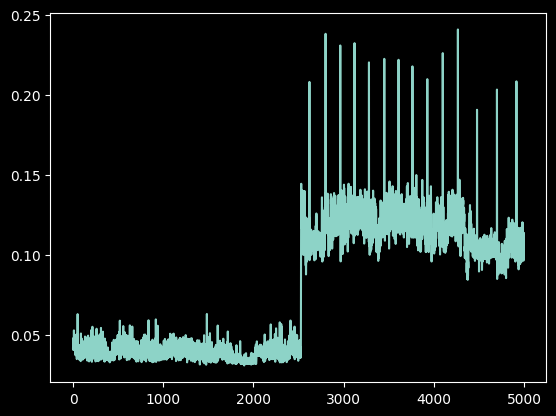

In [ ]:
print('success rate',suc)
print('failed rate',fail)
acc=suc/(suc+fail)
print('the accuarcy of l2 without v cell = ',acc)
plt.plot(time1)

In [ ]:
def predict2(query):
    query_vector=model.encode([query])
    k=1
    distances ,indices =index2.search(query_vector , k )
    best_job_id=job_ids[indices[0][0]]
    return trans_df_unique.loc[trans_df_unique['Job Id']== best_job_id]['Job Title']

In [ ]:
time2=[]
test2={}
suc2=0
fail2=0
for i in range (30000,35000):
    test= trans_df['job_text_clean'].iloc[i][10:60]
    ans=trans_df['Job Title'].iloc[i]
    start = time.time()
    pre=predict2(test).iloc[0]
    end = time.time()
    elapsed = end - start
    time2.append(elapsed)
    if pre == ans :
        suc2 +=1
    else:
        fail2 +=1
        test2[ans]=pre

success rate 4016
failed rate 984
the accuarcy of l2 with v cell =  0.8032


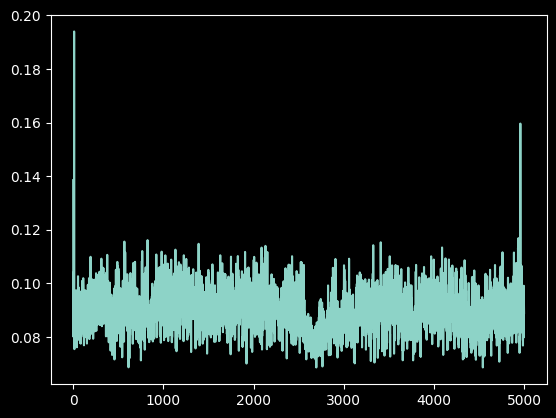

In [ ]:
print('success rate',suc2)
print('failed rate',fail2)
acc2=suc2/(suc2+fail2)
print('the accuarcy of l2 with v cell = ',acc2)
plt.plot(time2)

In [ ]:
time1=pd.DataFrame(time1)
time1.describe()

,0
count,5000.000000
mean,0.077272
std,0.039587
min,0.031063
25%,0.038941
50%,0.052255
75%,0.115041
max,0.240942


In [ ]:
time2=pd.DataFrame(time2)
time2.describe()

,0
count,5000.000000
mean,0.089479
std,0.007736
min,0.068634
25%,0.084188
50%,0.089200
75%,0.094398
max,0.193976


In [ ]:
# Save embeddings + job_ids
np.save("job_embeddings.npy", job_embeddings)
np.save("job_ids.npy", job_ids)
# Save FAISS index
faiss.write_index(index, "jobs.index")
np.save('combined_list.npy',combined_list)
